# Steady State Preliminary Exploit Analysis
Updated Aug 23, 2021

Developer: Jasmine Brunson



Steady State aims to simplify and strengthen cryptocurrency platforms and protocols and their markets by providing comprehensive insurance coverage through automated smart contracts and data analysis that removes bias, increases efficiency, and ensures immutable claims processing. The following notebook extrapolates data recorded for over 3 years in the DeFi space. 

The following notebook displays exploratory data analysis, augmented dataframes, linear regression graphs, and more to extrapolate on the data on hacks/exploits that exist in the decentralized finance industry. The Steady State Protocol Exploits notebook is a framework for future projects pertaining to finding relationships between units of analysis. 

Ex. Is there a relationship between the date of an exploit and the market cap uptrend or downtrend leading up to the exploit?

With the Risk Analysis DB (RAD) we are able to ask questions like these...

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import os 

from IPython.display import Image
from sklearn.linear_model import LinearRegression

In [3]:
print(os.getcwd())

/Users/jasmineb33/Downloads


In [4]:
path = 'ER-Modeled-DB-21.csv'
df = pd.read_csv(path)
df.head() # First 5 recorded

,ptcl_name,prtcl_id,is_core,contract_hkd,hcker_address,hk_trans_hash,block_id,gas_for_hcktrans,exploit_date,avg_gas_whenhck,...,dollar_value_lost,ETH_lost,BTC_lost,oth_tokn_loss,was_recovered,dollar_value_recovered,ETH_recovered,BTC_recovered,oth_tokn_recoverd,source_link
0,Bancor,NaN,YES,0x009BB5e9fCF28E5E601B7D0e9e821da6365d0a9c,0xbCEaA0040764009fdCFf407e82Ad1f06465fd2C4,0xc0bbc8dcf63b7e17aecfd8e90d6f131ebddd904d4fac...,5771739,37472.0,9/7/18,NaN,...,13500000.0,NaN,NaN,"24984 eth (12,500,000), 3,200,000BNT (10,000,0...",NaN,NaN,NaN,NaN,NaN,https://www.apriorit.com/dev-blog/554-bancor-e...
1,Opyn,NaN,YES,0xe7870231992ab4b1a01814fa0a599115fe94203f,0x915c2d6f571d3d47a182dd59d5f41e87d4c3fb8e,0x351bcbb182cb11cecb0d50d9f1bf45bd6820b71f7de5...,10592504,522066.0,4/8/2020,NaN,...,371260.0,NaN,NaN,371000 USDC,NaN,NaN,NaN,NaN,NaN,https://defirate.com/opyn-hack/
2,MakerDAO,NaN,YES,0x9f8F72aA9304c8B593d555F12eF6589cC3A579A2,0x9c05a05893ada984fc20d0da0c046de5cc0e8273,0xf521860de947bda81102589944777c98cd4cdda328d8...,9656756,447316.0,12/3/2020,NaN,...,8320000.0,NaN,NaN,62892.93 ETH,NaN,NaN,NaN,NaN,NaN,https://medium.com/@whiterabbit_hq/black-thurs...
3,UniSwap v1,NaN,YES,0xc0a47dFe034B400B47bDaD5FecDa2621de6c4d95,0xa9bf70a420d364e923c74448d9d817d3f2a77822,?,NaN,NaN,12/4/2020,NaN,...,300000.0,NaN,NaN,1764 ETH,NaN,NaN,NaN,NaN,NaN,https://defirate.com/imbtc-uniswap-hack/
4,Akropolis,NaN,YES,0x7967ada2a32a633d5c055e2e075a83023b632b4e,0x9f26aE5cd245bFEeb5926D61497550f79D9C6C1c,0xf15623567231c67df2b8bcc5540236fbda2c3ac11ecb...,11242699,44937.0,12/11/2020,NaN,...,2030851.0,NaN,NaN,2030850.5 DAI,NaN,NaN,NaN,NaN,NaN,https://www.rekt.news/akropolis-rekt/


In [5]:
[col for col in df] # A data frame is an iterator that yields the column names

['ptcl_name',
 'prtcl_id',
 'is_core',
 'contract_hkd',
 'hcker_address',
 'hk_trans_hash',
 'block_id',
 'gas_for_hcktrans',
 'exploit_date',
 'avg_gas_whenhck',
 'ptcl_Mcap_whenhckd',
 'hck_style',
 'was_audited',
 'dollar_value_lost',
 'ETH_lost',
 'BTC_lost',
 'oth_tokn_loss',
 'was_recovered',
 'dollar_value_recovered',
 'ETH_recovered',
 'BTC_recovered',
 'oth_tokn_recoverd',
 'source_link']

### Amount of ETH gas loss in DeFi hack 

The Ethereum gas used in hacks/exploits 

In [6]:
df[['ptcl_name', 'gas_for_hcktrans']].head()

,ptcl_name,gas_for_hcktrans
0,Bancor,37472.0
1,Opyn,522066.0
2,MakerDAO,447316.0
3,UniSwap v1,NaN
4,Akropolis,44937.0


In [7]:
df['gas_for_hcktrans'].size, df['gas_for_hcktrans'].dropna().size

(229, 45)

In [8]:
ndf = df[['ptcl_name', 'gas_for_hcktrans']].dropna() # Drops null values in gas df

In [9]:
ndf["gas_for_hcktrans"]
ndf["gas_for_hcktrans"].astype(float).astype(int).head()

0      37472
1     522066
2     447316
4      44937
5    8644044
Name: gas_for_hcktrans, dtype: int64

In [10]:
ndf.head()

,ptcl_name,gas_for_hcktrans
0,Bancor,37472.0
1,Opyn,522066.0
2,MakerDAO,447316.0
4,Akropolis,44937.0
5,Yearn Finance yDai Vault,8644044.0


In [11]:
'''
plt.scatter(ndf["gas_for_hcktrans"], ndf["ptcl_name"])
plt.title('Ethereum gas used by hacker per trans')
plt.xlabel('Amount')
plt.ylabel('Protocal')
plt.tight_layout(-20) #Spaces out x-axis data so that it no longer overlaps
'''

'\nplt.scatter(ndf["gas_for_hcktrans"], ndf["ptcl_name"])\nplt.title(\'Ethereum gas used by hacker per trans\')\nplt.xlabel(\'Amount\')\nplt.ylabel(\'Protocal\')\nplt.tight_layout(-20) #Spaces out x-axis data so that it no longer overlaps\n'

### Market Cap of DeFi Project

In [12]:
mc_df = df[['ptcl_name','ptcl_Mcap_whenhckd']].dropna()
mc_df.head()

,ptcl_name,ptcl_Mcap_whenhckd
0,Bancor,7.200000e+07
2,MakerDAO,4.250000e+08
4,Akropolis,2.700000e+07
5,Yearn Finance yDai Vault,1.220000e+09
6,Spartan Protocol,9.500000e+06


In [13]:
mc_df["ptcl_Mcap_whenhckd"].astype(float).astype(int).head() # Changes dtype for mCap from float to int

0      72000000
2     425000000
4      27000000
5    1220000000
6       9500000
Name: ptcl_Mcap_whenhckd, dtype: int64

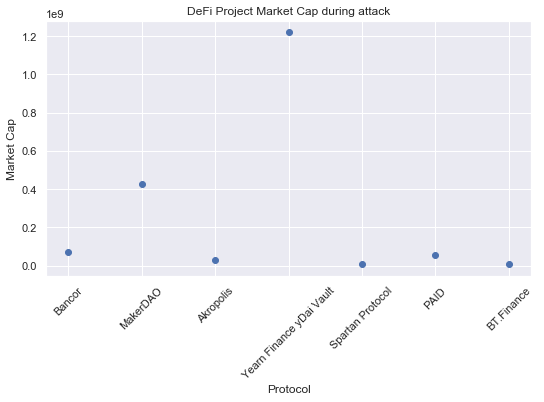

In [14]:
# Scatter plot represents a random set of 7 data points 
# representing DeFi protocols with low market caps during the hack/exploit

plt.scatter(mc_df["ptcl_name"].head(7), mc_df["ptcl_Mcap_whenhckd"].head(7))
plt.title('DeFi Project Market Cap during attack')
plt.xlabel('Protocol')
plt.ylabel('Market Cap')

plt.xticks(rotation=45)
plt.tight_layout(-5) #Spaces out x-axis data so that it no longer overlaps

In [15]:
mc_df = df[['ptcl_name', 'ptcl_Mcap_whenhckd']].dropna() # Drops null values in gas df
mc_df.head()

,ptcl_name,ptcl_Mcap_whenhckd
0,Bancor,7.200000e+07
2,MakerDAO,4.250000e+08
4,Akropolis,2.700000e+07
5,Yearn Finance yDai Vault,1.220000e+09
6,Spartan Protocol,9.500000e+06


In [16]:
mc_df["ptcl_Mcap_whenhckd"].head()

0    7.200000e+07
2    4.250000e+08
4    2.700000e+07
5    1.220000e+09
6    9.500000e+06
Name: ptcl_Mcap_whenhckd, dtype: float64

In [17]:
mc_df["ptcl_Mcap_whenhckd"].astype(float).astype(int).head()

0      72000000
2     425000000
4      27000000
5    1220000000
6       9500000
Name: ptcl_Mcap_whenhckd, dtype: int64

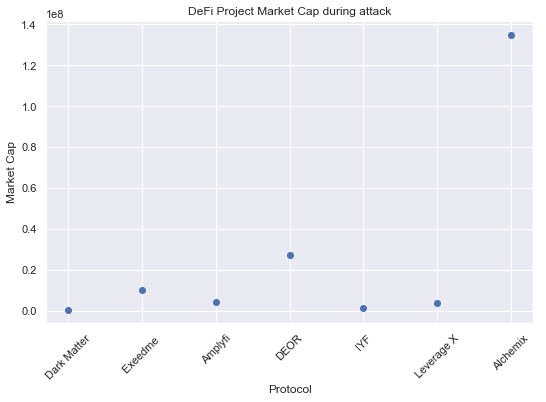

In [18]:
plt.scatter(mc_df["ptcl_name"].tail(7), mc_df["ptcl_Mcap_whenhckd"].tail(7))
plt.title('DeFi Project Market Cap during attack')
plt.xlabel('Protocol')
plt.ylabel('Market Cap')

plt.xticks(rotation=45)
plt.tight_layout(-5) #Spaces out x-axis data so that it no longer overlaps

In [19]:
df["dollar_value_lost"]
df["dollar_value_lost"].dropna().head()
#df["dollar_value_lost"].astype(float).astype(int)

0    13500000.0
1      371260.0
2     8320000.0
3      300000.0
4     2030851.0
Name: dollar_value_lost, dtype: float64

### Top 10 Protocol Attacks by lowest Market Cap

The following protocols are the "least" susceptible by Market Cap valuation. Later in the analysis we can associate how protocol type, exploit type, and Market Cap are associated. Analytically, we cannot assumed that the protocol with the lowest Market Cap is "least" susceptible but with this ordered list we can target how often certain protocols and exploits appear in relation to project Market Cap. 

In [20]:
mc_sorted_df = mc_df.sort_values(by='ptcl_Mcap_whenhckd', ascending=True) # Sorts Market Caps from smallest to largest
mc_sorted_df.head(10) # Consolidate top 10 ptcls with low market cap

,ptcl_name,ptcl_Mcap_whenhckd
81,keep3rX,12626.0
114,K3psav,28014.0
83,Burn Vault Finance,34970.0
59,Vaultz,38885.0
87,Contribute.Protocol,46000.0
117,DarkDeFi,128500.0
138,Magix,150000.0
93,Defibase,224034.0
119,iProtocol,305000.0
51,VEther/Vader,330000.0


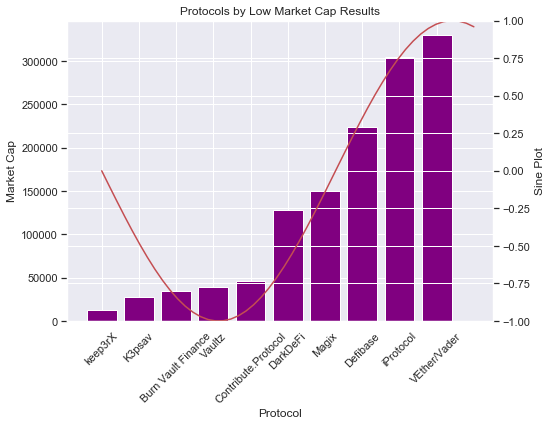

In [21]:
plt.figure()
N = 10
plt.bar(x=mc_sorted_df["ptcl_name"].head(10),
 
        height=mc_sorted_df["ptcl_Mcap_whenhckd"].head(10), color="purple")

plt.title("Protocols by Low Market Cap Results")
plt.xlabel("Protocol")
plt.ylabel("Market Cap")
plt.tight_layout(-3)
plt.xticks(rotation=45)

x = np.linspace(0, N)
y = np.sin(x * -.5)
axes2 = plt.twinx()
axes2.plot(x, y, color='r', label='Sine')
axes2.set_ylim(-1, 1)
axes2.set_ylabel('Sine Plot')

plt.show()

### Top 10 Protocol Attacks by highest Market Cap

The following protocols are the "most" susceptible by Market Cap valuation. Later in the analysis we will associate factors such as protocol type, exploit type, and Market Cap are associated. Analytically, we cannot assumed that the protocol with the highest Market Cap is "most" susceptible but with this ordered list we can target how often certain protocols and exploits appear in relation to project Market Cap.

In [21]:
mc_sorted_df.tail(10)

,ptcl_name,ptcl_Mcap_whenhckd
17,Rari Capital,1.600000e+08
52,SushiSwap,1.950000e+08
14,SushiSwap,2.000000e+08
140,Veritaseum,3.200000e+08
55,Dodo,4.000000e+08
2,MakerDAO,4.250000e+08
22,Alpha,5.440000e+08
50,SushiSwap,1.140000e+09
5,Yearn Finance yDai Vault,1.220000e+09
16,The DAO,5.000000e+10


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

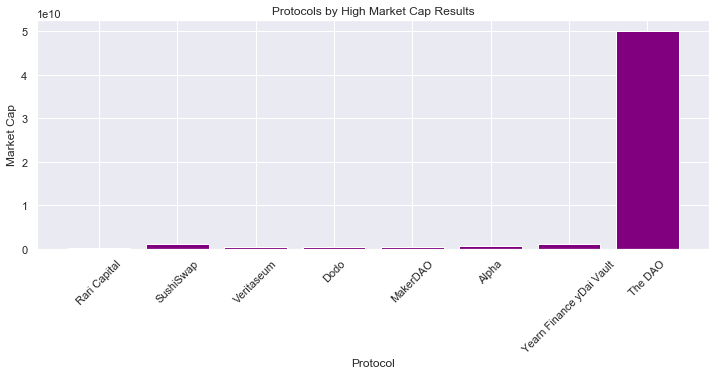

In [22]:
fig, ax = plt.subplots(figsize =(9, 3))
plt.bar(x=mc_sorted_df["ptcl_name"].tail(10),
 
        height=mc_sorted_df["ptcl_Mcap_whenhckd"].tail(10), color="purple")

plt.title("Protocols by High Market Cap Results")
plt.xlabel("Protocol")
plt.ylabel("Market Cap")
plt.tight_layout(-3)
plt.xticks(rotation=45)

## Total Digital Asset loss in hacker exploit

The following analysis is an aggregation of DataFrames and plots derived from the dollar value loss in hacks/exploits. We were able to find how the top losses in the DeFi industry including rug pulls, privat key compromises, smart contract exploits, flash loan attacks, reentrancies, and etc.

In [36]:
dv_df = df[['ptcl_name','dollar_value_lost']].dropna() # Drops null values in DV loss col

In [25]:
dv_df.head()

,ptcl_name,dollar_value_lost
0,Bancor,13500000.0
1,Opyn,371260.0
2,MakerDAO,8320000.0
3,UniSwap v1,300000.0
4,Akropolis,2030851.0


In [29]:
dv_df['dollar_value_lost'].astype(float).astype(int).head()

0    13500000
1      371260
2     8320000
3      300000
4     2030851
Name: dollar_value_lost, dtype: int64

In [30]:
dv_df.head()

,ptcl_name,dollar_value_lost
0,Bancor,13500000.0
1,Opyn,371260.0
2,MakerDAO,8320000.0
3,UniSwap v1,300000.0
4,Akropolis,2030851.0


In [31]:
dv_sorted_df = dv_df.sort_values(by='dollar_value_lost', ascending=True) # Sorts Market Caps from smallest to largest
dv_sorted_df.head(10) # Consolidate top 10 ptcls with low market cap

,ptcl_name,dollar_value_lost
79,Yearnspace,0.0
83,Burn Vault Finance,1396.0
60,penny protocol,1884.0
148,Dark Matter,3000.0
144,SantaDAO,3456.0
134,Cakelock,4230.0
137,Hatch DAO,4319.0
95,Shabuvault,5500.0
138,Magix,6000.0
87,Contribute.Protocol,6000.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

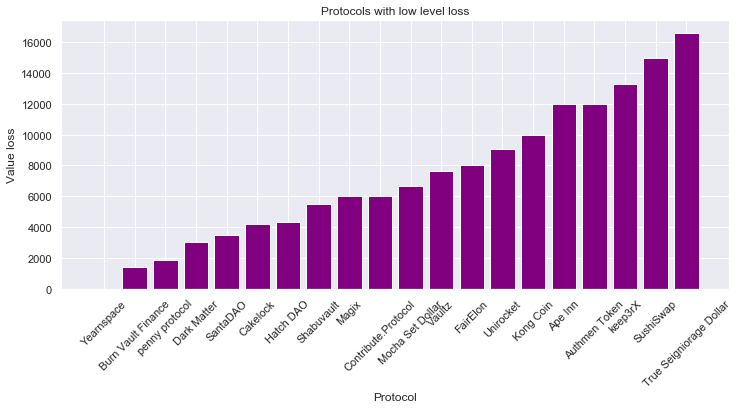

In [32]:
N=20
fig, ax = plt.subplots(figsize =(9, 3)) # figure size

plt.bar(x=dv_sorted_df["ptcl_name"].head(20),
 
        height=dv_sorted_df["dollar_value_lost"].head(20), color="purple")

plt.title("Protocols with low level loss")
plt.xlabel("Protocol")
plt.ylabel("Value loss")
plt.tight_layout(-5)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

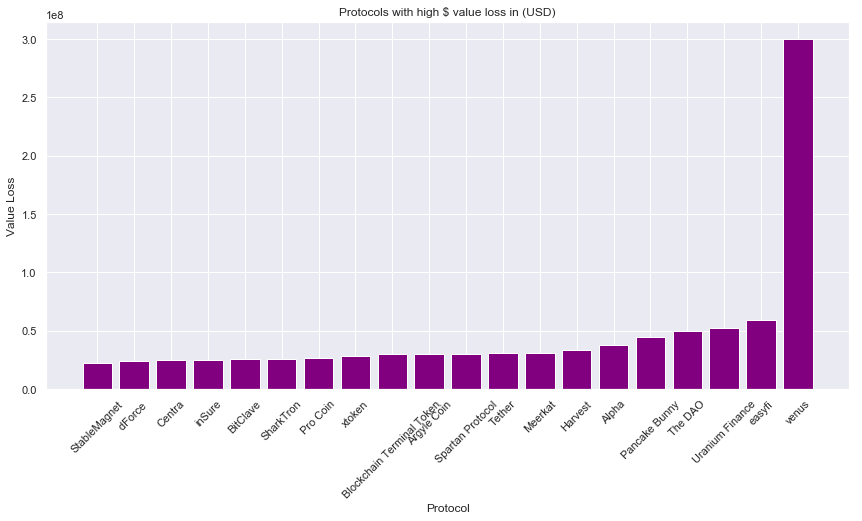

In [33]:
fig, ax = plt.subplots(figsize =(9, 3)) # figure size

plt.bar(x=dv_sorted_df["ptcl_name"].tail(20),
 
        height=dv_sorted_df["dollar_value_lost"].tail(20), color="purple")

 
plt.title("Protocols with high $ value loss in (USD)")
plt.xlabel("Protocol")
plt.ylabel("Value Loss")
plt.tight_layout(-10)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

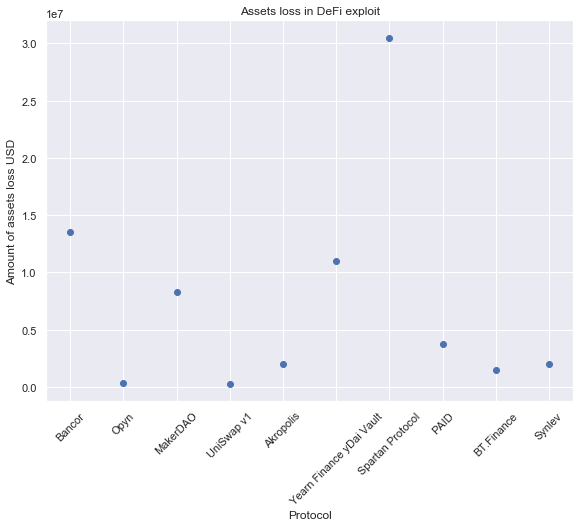

In [34]:
plt.scatter(dv_df['ptcl_name'].head(10), dv_df['dollar_value_lost'].head(10))
plt.title('Assets loss in DeFi exploit')
plt.xlabel('Protocol')
plt.ylabel('Amount of assets loss USD')
plt.tight_layout(-7) #Spaces out x-axis data so that it no longer overlaps
plt.xticks(rotation=45)